In [ ]:
#Student Names and ID: Jiachen Liu (1010182204)
#Instructor Name: Professor Shion Guha
#Course Code: INF2178
#Course Name: Experimental Design for Data Science
#Program: Master of Information
#Faculty: Faculty of Information
#School: University of Toronto

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
#load packages needed for analyzing this dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

In [121]:
#read the "data" tab of the data excel into a DataFrame
file_path = "/content/drive/MyDrive/inf2178/A2/INF2178_A2_data.xlsx"
data = pd.read_excel(file_path, sheet_name="ChildCareCentres")

#print the number of datapoints in this DataFrame
print("Number of datapoints:", len(data))

#display the first few rows of the DataFrame
data.head()

Number of datapoints: 1063


,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [122]:
#display the basic information of the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          1063 non-null   int64 
 1   LOC_ID       1063 non-null   int64 
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   int64 
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     715 non-null    object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(9), object(8)
memory usage: 141.3+ KB


From the dataset's information displayed above, we can see that there are several cleaning steps need to be done before conducting any statistical analysis.

1.There are missing values in "BLDGNAME" column

2.Column "_id" name is hard to use when coding, needs to be renamed

3.Datatypes of columns "_id", "LOC_ID", "ward" need to be converted to string.

In [123]:
#data cleaning
#1.replace missing cells in "BLDGNAME" column as "Not specified"
data["BLDGNAME"].fillna("Not Specified", inplace=True)

#2.rename column "_id" to "ID"
data.rename(columns={"_id":"ID"}, inplace = True)

#3.converting datatypes to string for "_id", "LOC_ID", "ward"
data["ID"] = data["ID"].astype(str)
data['LOC_ID'] = data["LOC_ID"].astype(str)
data['ward'] = data["ward"].astype(str)

#after cleaning, check the data info again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1063 non-null   object
 1   LOC_ID       1063 non-null   object
 2   LOC_NAME     1063 non-null   object
 3   AUSPICE      1063 non-null   object
 4   ADDRESS      1063 non-null   object
 5   PCODE        1063 non-null   object
 6   ward         1063 non-null   object
 7   bldg_type    1063 non-null   object
 8   BLDGNAME     1063 non-null   object
 9   IGSPACE      1063 non-null   int64 
 10  TGSPACE      1063 non-null   int64 
 11  PGSPACE      1063 non-null   int64 
 12  KGSPACE      1063 non-null   int64 
 13  SGSPACE      1063 non-null   int64 
 14  TOTSPACE     1063 non-null   int64 
 15  subsidy      1063 non-null   object
 16  cwelcc_flag  1063 non-null   object
dtypes: int64(6), object(11)
memory usage: 141.3+ KB




**EDA**


**After basic data cleaning, I need to have several EDA conducted so I could have a better idea of the general image of child care center usage in Toronto. To do so, I have several topics need to be visualized.**

**1.The distribution of childcare centers by auspice in bar chart.**

**2.The distribution of childcare centers' capacities by auspice in box plot.**

**3.The distribution of childcare centers' capacities across different auspices and subsidy statuses in box plot.**

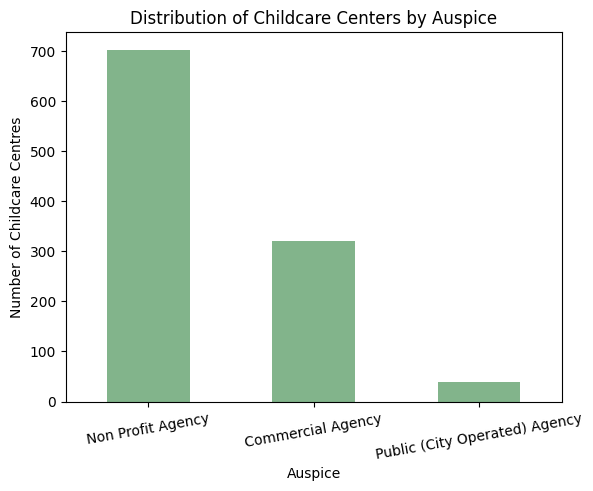

In [124]:
#1.The distribution of childcare centers by auspice in bar chart.

#for each auspice type, count the numbers of childcare centers
data1 = data.pivot_table(values = "TOTSPACE", index = "AUSPICE", aggfunc = len)

#visualize it in descending order
data1["TOTSPACE"].sort_values(ascending = False).plot(kind="bar", stacked=True, color="#82B48B")

#set plot format
plt.title("Distribution of Childcare Centers by Auspice")
plt.xlabel("Auspice")#set x-axis label
plt.ylabel("Number of Childcare Centres")#set y-axis label
plt.xticks(rotation = 10) #make the x-axis lable horizontally presented
plt.show()

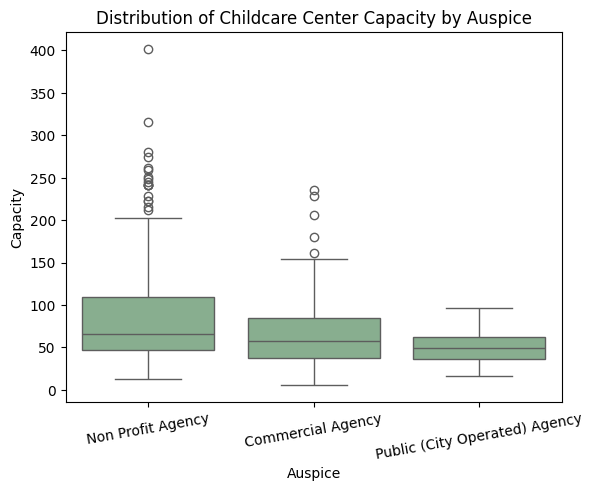

In [125]:
#2.The distribution of childcare centers' capacities by auspice in box plot.

sns.boxplot(x = "AUSPICE", y = "TOTSPACE", data = data[["AUSPICE","TOTSPACE"]], color = "#82B48B")

#set plot format
plt.title("Distribution of Childcare Center Capacity by Auspice")
plt.xlabel("Auspice")#set x-axis label
plt.ylabel("Capacity")#set y-axis label
plt.xticks(rotation = 10) #make the x-axis lable horizontally presented

plt.show()

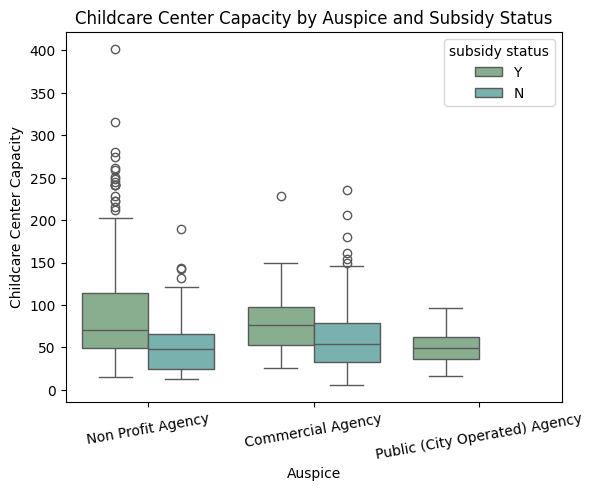

In [126]:
#3.The distribution of childcare centers' capacities across different auspices and subsidy statuses in box plot.

sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy", data=data, palette=["#82B48B", "#6FBBB7"])

#set plot format
plt.title("Childcare Center Capacity by Auspice and Subsidy Status")
plt.xlabel("Auspice")
plt.ylabel("Childcare Center Capacity")
plt.legend(title="subsidy status", loc="upper right")
plt.xticks(rotation = 10) #make the x-axis lable horizontally presented

plt.show()

**ONE-WAY ANOVA**

**After data cleaning and basic EDA, one of my research questions is that whether there is a difference in the means of chirldcare center space usage among five types of spaces targeting different ages of children.**

**Null Hypothesis ( 𝐻0 ): There is no significant difference in the means of childcare spaces usage("IGSPACE", "TGSPACE", "PGSPACE", "KGSPACE", "SGSPACE", "TOTSPACE") across the five types.**

**Alternative Hypothesis ( 𝐻1 ): At least one of the childcare space usage's mean is statistically significantly different from the ther four space types.**

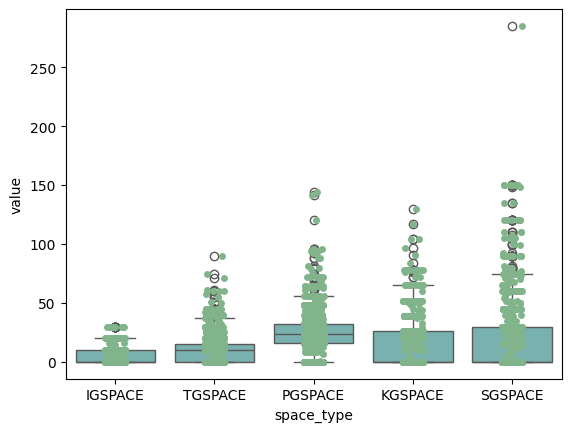

In [127]:
df_melt = pd.melt(data, id_vars=["AUSPICE", "ward", "subsidy", "cwelcc_flag"], value_vars=["IGSPACE", "TGSPACE", "PGSPACE", "KGSPACE", "SGSPACE"],var_name="space_type", value_name="value")
df_melt.columns = ["AUSPICE", "ward", "subsidy", "cwelcc_flag", "space_type", "value"]

#using a boxplot to see the data distribution by space type
ax = sns.boxplot(x="space_type", y="value", data=df_melt, color = "#6FBBB7")
ax = sns.stripplot(x="space_type", y="value", data=df_melt, color = "#82B48B")
plt.show()

In [128]:
#Ordinary Least Squares (OLS) model
model1 = ols("value ~ C(space_type)", data=df_melt).fit()
anova_table = sm.stats.anova_lm(model1, typ=2)
anova_table

#generate a one-way ANOVA table
res = stat()
res.anova_stat(df=df_melt, res_var="value", anova_model="value ~ C(space_type)")
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(space_type),4.0,2.821233e+05,70530.816839,188.190768,4.517383e-151
Residual,5310.0,1.990101e+06,374.783617,NaN,NaN


In [129]:
#Using Turkey's HSD post-hoc test to see the differences among five space types
res = stat()
res.tukey_hsd(df=df_melt, res_var="value", xfac_var="space_type", anova_model="value ~ C(space_type)")
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.412308,9.995029,12.974001,0.001000
1,IGSPACE,PGSPACE,20.362183,18.070822,22.653543,34.292619,0.001000
2,IGSPACE,KGSPACE,10.361242,8.069881,12.652602,17.449707,0.001000
3,IGSPACE,SGSPACE,17.764817,15.473456,20.056177,29.918310,0.001000
4,TGSPACE,PGSPACE,12.658514,10.367153,14.949874,21.318618,0.001000
5,TGSPACE,KGSPACE,2.657573,0.366213,4.948933,4.475706,0.013527
6,TGSPACE,SGSPACE,10.061148,7.769787,12.352508,16.944309,0.001000
7,PGSPACE,KGSPACE,10.000941,7.709580,12.292301,16.842912,0.001000
8,PGSPACE,SGSPACE,2.597366,0.306006,4.888726,4.374309,0.017028
9,KGSPACE,SGSPACE,7.403575,5.112214,9.694935,12.468603,0.001000


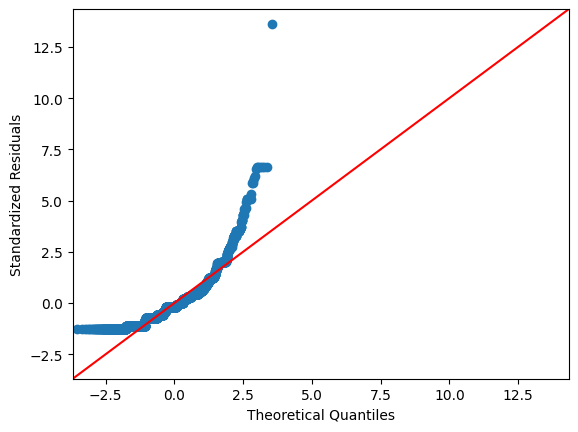

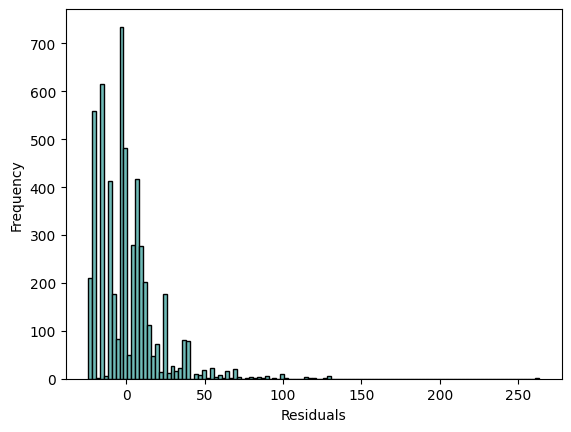

In [130]:
#We assume that res.anova_std_residuals are standardized residuals obtained from one-way ANOVA
#to check the assumption, generate a Q-Q plot of the standardized residuals
sm.qqplot(res.anova_std_residuals, line = "45")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

#we also need to generate the histogram of the resiiduals to check the normality
plt.hist(res.anova_model_out.resid, bins="auto", histtype="bar", ec="k", color="#6FBBB7")
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [131]:
#For a one-way ANOVA to work, we need to check two assumptions.
#Assumption 1: the normality of residuals distribution
#to check this assumption, we can use a Shapir Wilk test
w, pvalue = stats.shapiro(model1.resid)
if pvalue < 0.001:
  print(f"Shapiro-Wilk test statistic: {w}, p-value: <0.001")
else:
  print(f"Shapiro-Wilk test statistic: {w}, p-value: {pvalue}")

Shapiro-Wilk test statistic: 0.8427014350891113, p-value: <0.001


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [132]:
#Assumption 2: Variances are homoegenous
#to check this assumption, we have two approaches
#first approach: Bartlett's test when data is normally distributed
w, pvalue = stats.bartlett(data["IGSPACE"], data["TGSPACE"], data["PGSPACE"], data["KGSPACE"], data["SGSPACE"])

res = stat()
res.bartlett(df=df_melt, res_var="value", xfac_var="space_type")
res.bartlett_summary.loc[res.bartlett_summary["Value"] < 0.001, "Value"] = "< 0.001"
res.bartlett_summary #print out the Bartlett's test result

,Parameter,Value
0,Test statistics (T),2461.7361
1,Degrees of freedom (Df),4.0
2,p value,< 0.001


In [133]:
#second approach: Levene's test when data is not normally distributed
res.levene(df=df_melt, res_var="value", xfac_var="space_type")
res.levene_summary.loc[res.levene_summary["Value"] < 0.001, "Value"] = "< 0.001"
res.levene_summary

,Parameter,Value
0,Test statistics (W),142.6228
1,Degrees of freedom (Df),4.0
2,p value,< 0.001


**TWO-WAY ANOVA**

**My other research question is that how the auspice type of the centers affects the utilization of spacen.**

**Null Hypothesis ( 𝐻0 ): There is no significant difference in the means of spaces usage for all three types of auspices ("Non Profit Agency", "Commercial Agency", "Public Agency") and all five space types("IGSPACE", "TGSPACE", "PGSPACE", "KGSPACE", "SGSPACE", "TOTSPACE").**

**Alternative Hypothesis ( 𝐻1 ): At least one of the mean space usage is statistically significantly different from the other.**

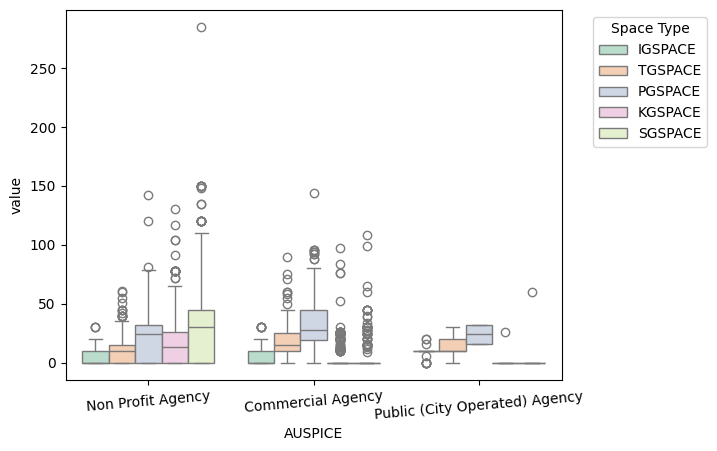

In [134]:
df_melt2 = pd.melt(data, id_vars=["AUSPICE", "ward", "subsidy", "cwelcc_flag"], value_vars=["IGSPACE", "TGSPACE", "PGSPACE", "KGSPACE", "SGSPACE"], var_name="space_type", value_name="value")
df_melt2.columns = ["AUSPICE", "ward", "subsidy", "cwelcc_flag", "space_type", "value"]

#using a boxplot to see the data distribution by space type and auspice type.
sns.boxplot(x="AUSPICE", y="value", hue="space_type",data=df_melt2, palette="Pastel2")

#set the plot format
plt.legend(title="Space Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation = 5)
plt.show()

In [135]:
#Ordinary Least Squares (OLS) model
model2 = ols("value ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)", data=df_melt2).fit()

#generate a two-way ANOVA table
anova_table = sm.stats.anova_lm(model2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),1.922242e+04,2.0,29.104369,2.685589e-13
C(space_type),2.821233e+05,4.0,213.579208,3.726614e-170
C(AUSPICE):C(space_type),2.206458e+05,8.0,83.519093,9.972931e-131
Residual,1.750233e+06,5300.0,NaN,NaN


In [136]:
#use ANOVA to see the significance of auspice types and space types
res = stat()
res.anova_stat(df=df_melt2, res_var="value", anova_model="value ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)")
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,1.922242e+04,9611.211429,29.104369,2.685589e-13
C(space_type),4.0,2.821233e+05,70530.816839,213.579208,3.726614e-170
C(AUSPICE):C(space_type),8.0,2.206458e+05,27580.726915,83.519093,9.972931e-131
Residual,5300.0,1.750233e+06,330.232598,NaN,NaN


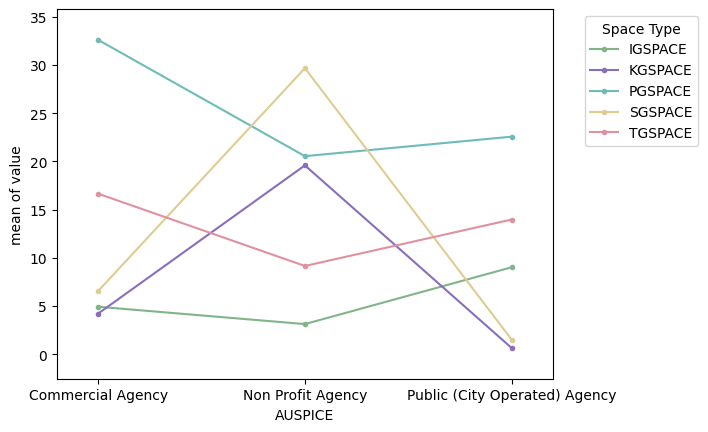

In [137]:
#generate an interaction plot to see auspice types and space types' effects on value
fig = interaction_plot(x=df_melt2["AUSPICE"], trace=df_melt2["space_type"], response=df_melt2["value"], colors=["#82B48B","#896FBB","#6FBBB7", "#DFCC91", "#DF91A0"])

#format the plot
plt.legend(title="Space Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [138]:
#Using Turkey's HSD post-hoc test to see the differences among five space types
res.tukey_hsd(df=df_melt2, res_var="value", xfac_var="space_type", anova_model="value ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)")
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.552803,9.854535,13.821471,0.001000
1,IGSPACE,PGSPACE,20.362183,18.211316,22.513049,36.532634,0.001000
2,IGSPACE,KGSPACE,10.361242,8.210376,12.512108,18.589533,0.001000
3,IGSPACE,SGSPACE,17.764817,15.613951,19.915683,31.872592,0.001000
4,TGSPACE,PGSPACE,12.658514,10.507648,14.809380,22.711163,0.001000
5,TGSPACE,KGSPACE,2.657573,0.506707,4.808439,4.768062,0.006750
6,TGSPACE,SGSPACE,10.061148,7.910282,12.212014,18.051121,0.001000
7,PGSPACE,KGSPACE,10.000941,7.850075,12.151807,17.943102,0.001000
8,PGSPACE,SGSPACE,2.597366,0.446500,4.748232,4.660042,0.008773
9,KGSPACE,SGSPACE,7.403575,5.252709,9.554441,13.283060,0.001000


In [139]:
#Using Turkey's HSD post-hoc test to see the differences among three auspice types
res.tukey_hsd(df=df_melt2, res_var="value", xfac_var="AUSPICE", anova_model="value ~ C(AUSPICE) + C(space_type) + C(AUSPICE):C(space_type)")
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,3.423883,2.140456,4.707311,8.844824,0.001000
1,Non Profit Agency,Public (City Operated) Agency,6.866922,3.732600,10.001244,7.263738,0.001000
2,Commercial Agency,Public (City Operated) Agency,3.443039,0.212180,6.673898,3.533178,0.033472
